# Data 
## Time Series Prediction

In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
# Import libraries
from __future__ import absolute_import, division, print_function

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import math

# Graphing Libraries
import matplotlib.pyplot as pyplt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import seaborn as sns
sns.set_style("white") 


from IPython.display import display

### Load Dataset

In [3]:
data = pd.read_csv('data/AirPassengers.csv', 
            parse_dates=[0], 
            index_col='Month')

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
ts = data['#Passengers'] 
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [5]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

### Check the time series data for stationarity
1. constant mean
2. constant variance
3. autocovariance that does not depend on time

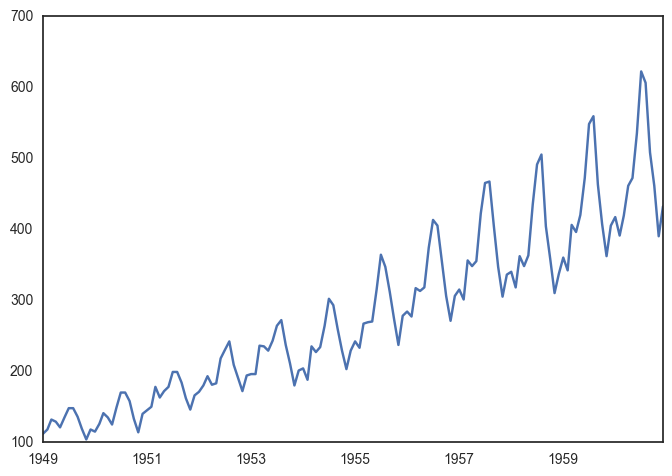

In [6]:
pyplt.plot(ts);

After plotting the data, I can see a general upward trend, as well as seasonal trends.

In [7]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    """
    Generate rolling statistic plot 
    
    Attributes
    ----------
    timeseries: pandas series
    """
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    pyplt.legend(loc='best')
    pyplt.title('Rolling Mean & Standard Deviation')
    pyplt.show(block=False)

def Dickey_Fuller(timeseries):
    """
    Perform Dickey Fuller test for stationarity on the a timeseries
    
    Attributes
    ----------
    timeseries: pandas series
    """
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

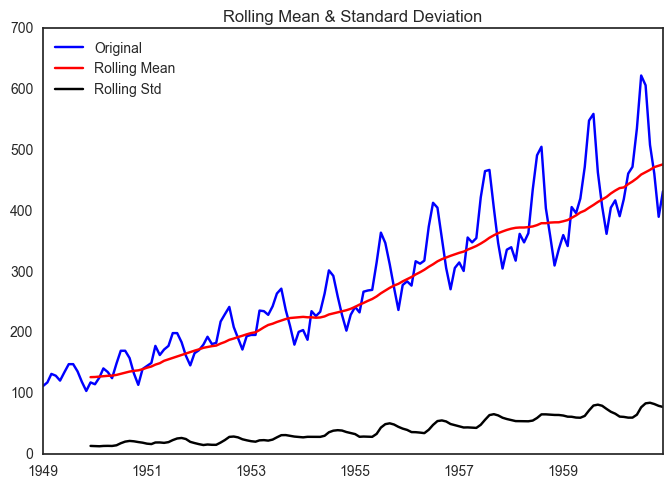

In [8]:
test_stationarity(ts)

In [9]:
Dickey_Fuller(ts)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


This is not a stationary timeseries. The mean isn't constant. Further, the test statistics is way bigger than the critical values.